In [1]:
import os 
import zipfile

### Data Extraction

In [3]:
# Path to the zip file
zip_file_path = 'Dataset-zip\dog-breed-120.zip'

# Path to the dataset folder
dataset_folder = '.\Dataset-org'

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_folder)

print(f"Data extracted to {dataset_folder}")

Data extracted to .\Dataset-org


In [5]:
files_list = os.listdir(r"Dataset-org\Dogs class")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import random
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, HTML

## Visualization 

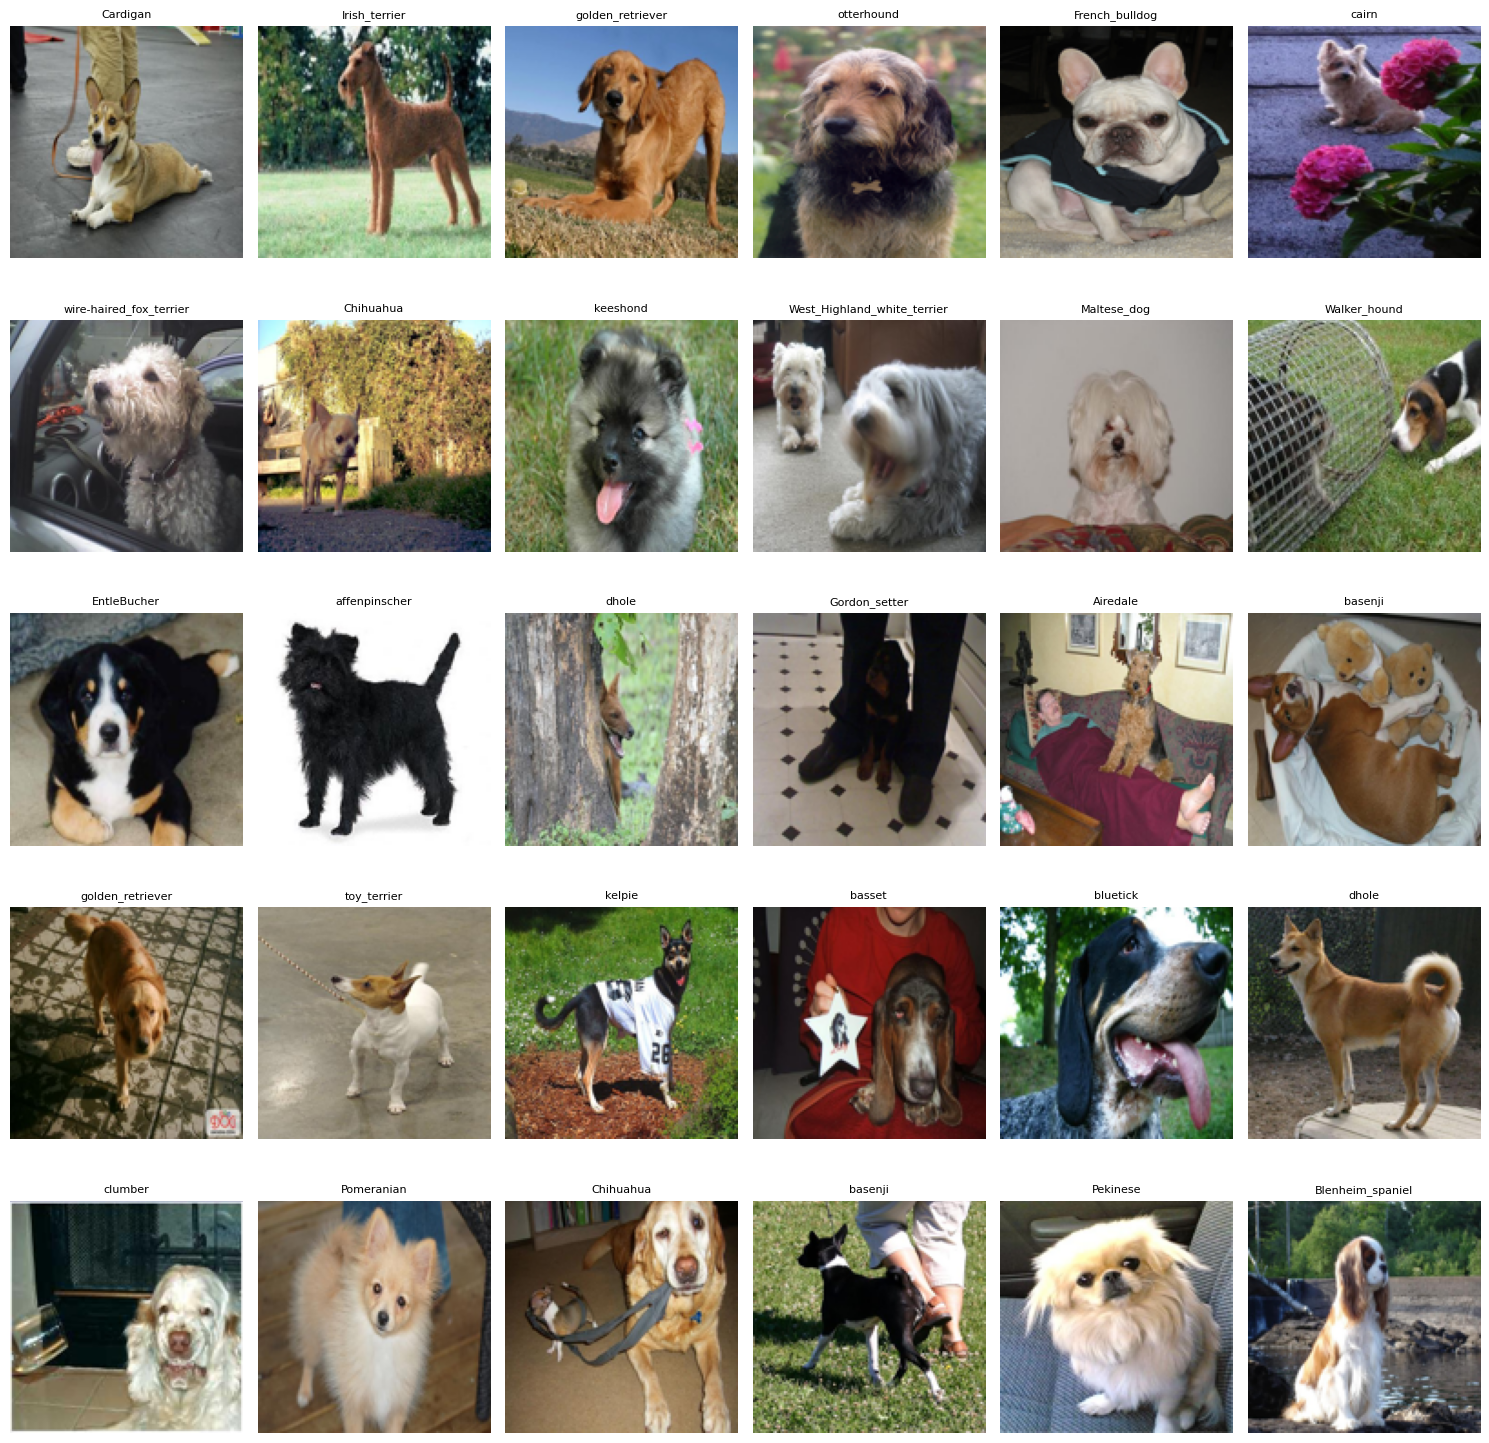

In [3]:
# path to the dataset
dataset_path = "Dataset-org/Dogs_class"

# lists to hold images and labels
image_paths = []
labels = []

# Traverse the dataset directory
for breed_folder in os.listdir(dataset_path):
    breed_folder_path = os.path.join(dataset_path, breed_folder)
    
    if os.path.isdir(breed_folder_path):  # Ensure it's a folder
        # Corrected breed label extraction
        breed_label = "-".join(breed_folder.split("-")[1:])  # Join all parts after the first one
        for img_file in os.listdir(breed_folder_path):
            if img_file.endswith(('png', 'jpg', 'jpeg')):  # Check for image extensions
                image_paths.append(os.path.join(breed_folder_path, img_file))
                labels.append(breed_label)

# Randomly select 30 images
selected_indices = random.sample(range(len(image_paths)), 30)
selected_images = [image_paths[i] for i in selected_indices]
selected_labels = [labels[i] for i in selected_indices]

# Define the fixed image size
fixed_size = (128, 128)

# Visualize the selected images
plt.figure(figsize=(15, 15))
for idx, img_path in enumerate(selected_images):
    plt.subplot(5, 6, idx + 1)  # 5 rows, 6 columns
    img = Image.open(img_path)
    img = img.resize(fixed_size)  # Resize image to 128x128 pixels
    plt.imshow(img)
    plt.title(selected_labels[idx], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Total number of breeds

In [4]:
import numpy as np

unique_labels = np.unique(labels)
print('Labels:')
print('-------------------------------------------------------------------------')
print(unique_labels)
print('-------------------------------------------------------------------------')
print('total breeds: ',len(unique_labels))
print('-------------------------------------------------------------------------')

Labels:
-------------------------------------------------------------------------
['Afghan_hound' 'African_hunting_dog' 'Airedale'
 'American_Staffordshire_terrier' 'Appenzeller' 'Australian_terrier'
 'Bedlington_terrier' 'Bernese_mountain_dog' 'Blenheim_spaniel'
 'Border_collie' 'Border_terrier' 'Boston_bull' 'Bouvier_des_Flandres'
 'Brabancon_griffon' 'Brittany_spaniel' 'Cardigan'
 'Chesapeake_Bay_retriever' 'Chihuahua' 'Dandie_Dinmont' 'Doberman'
 'English_foxhound' 'English_setter' 'English_springer' 'EntleBucher'
 'Eskimo_dog' 'French_bulldog' 'German_shepherd'
 'German_short-haired_pointer' 'Gordon_setter' 'Great_Dane'
 'Great_Pyrenees' 'Greater_Swiss_Mountain_dog' 'Ibizan_hound'
 'Irish_setter' 'Irish_terrier' 'Irish_water_spaniel' 'Irish_wolfhound'
 'Italian_greyhound' 'Japanese_spaniel' 'Kerry_blue_terrier'
 'Labrador_retriever' 'Lakeland_terrier' 'Leonberg' 'Lhasa' 'Maltese_dog'
 'Mexican_hairless' 'Newfoundland' 'Norfolk_terrier' 'Norwegian_elkhound'
 'Norwich_terrier' 'Old_

## Classes Visualization

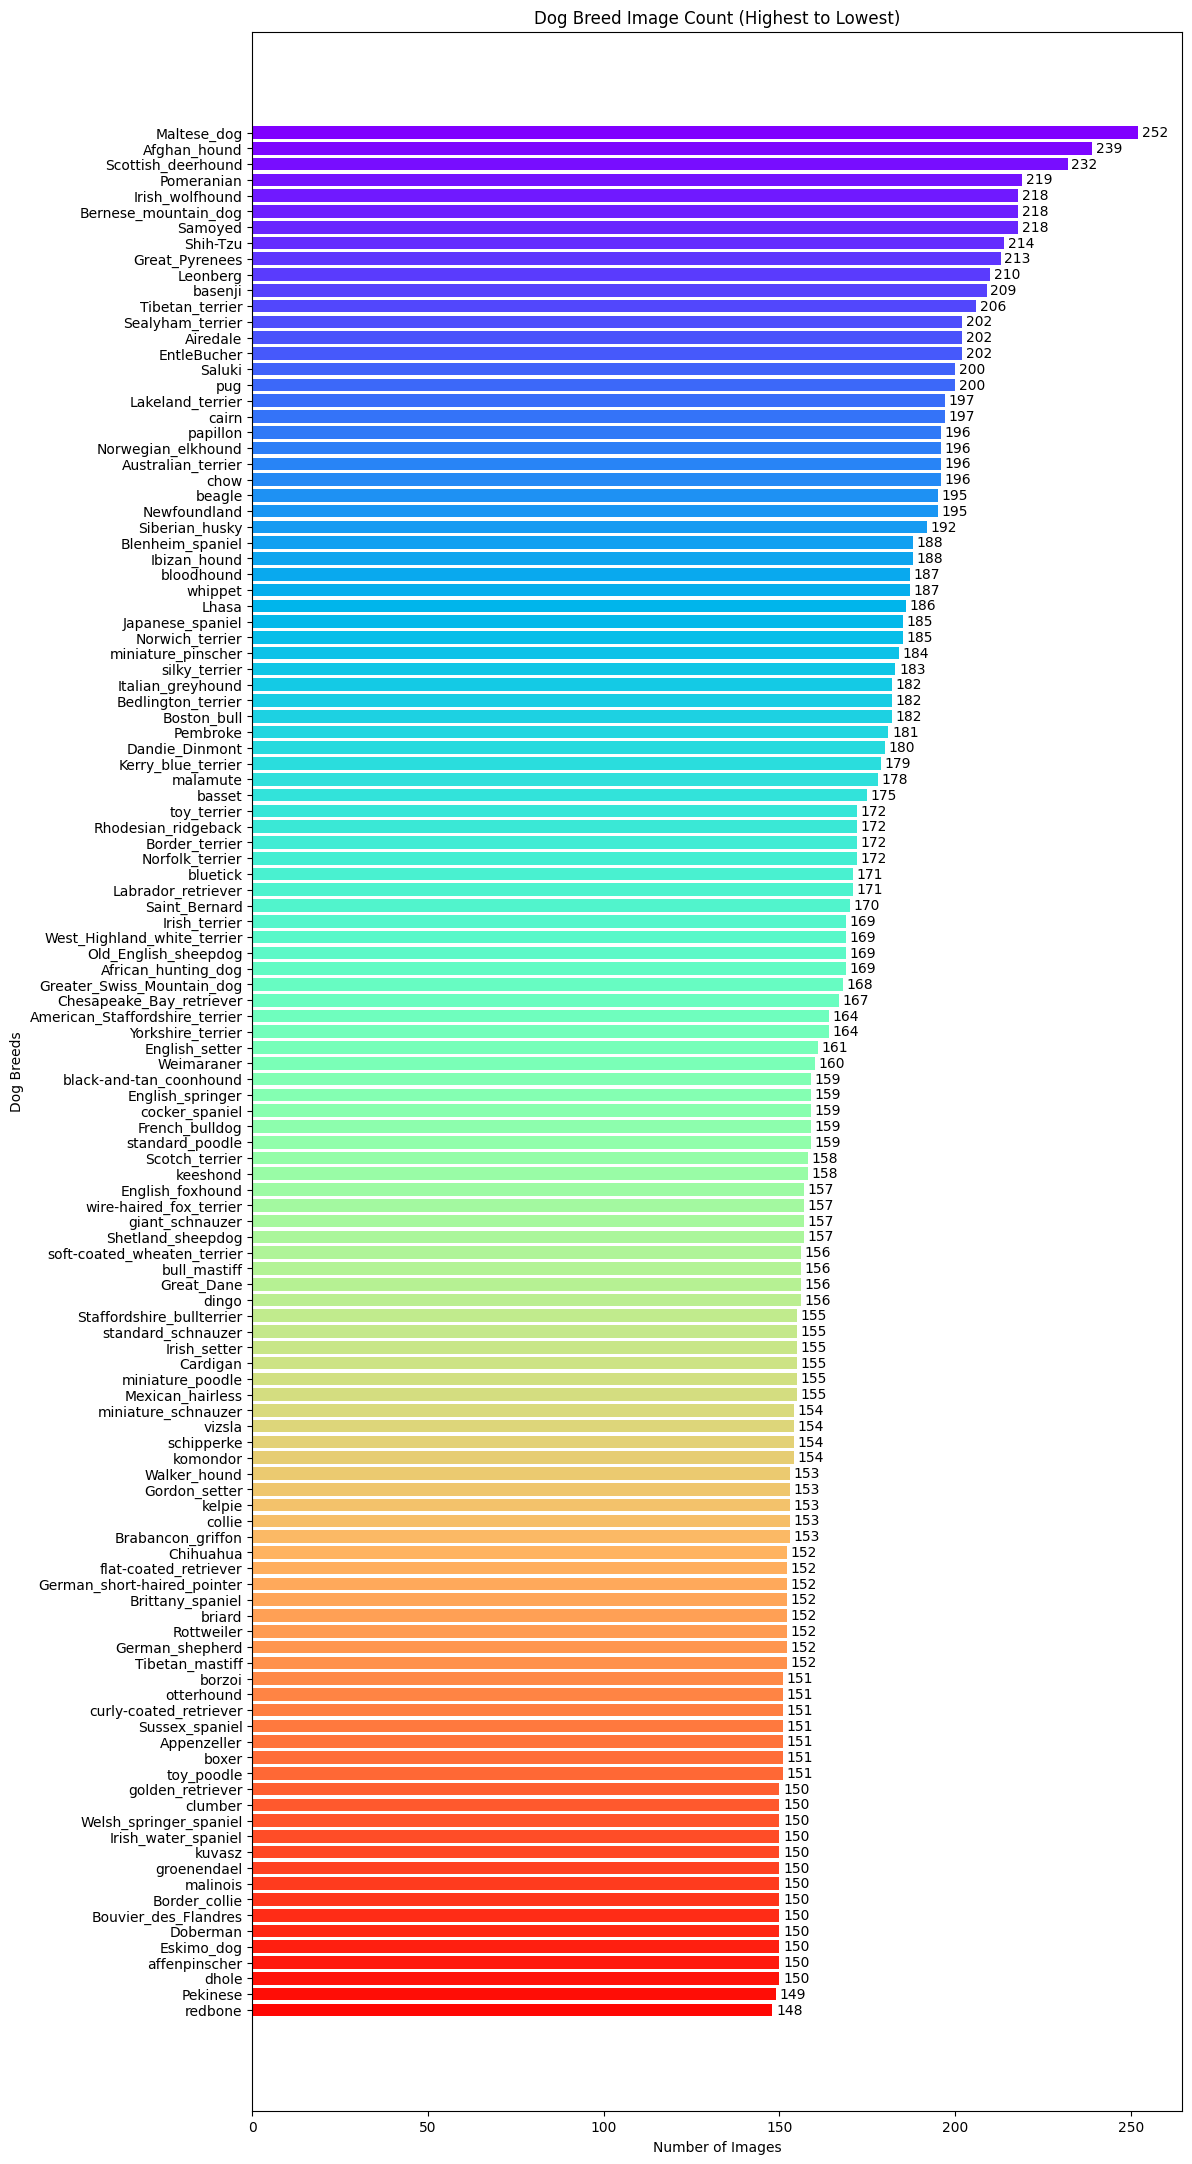

In [5]:
# Count each label's occurrences
label_counts = Counter(labels)

# Sort labels by count in descending order
sorted_labels = dict(label_counts.most_common())

# Extract data for plotting
breed_names = list(sorted_labels.keys())
counts = list(sorted_labels.values())

# Define a colormap for rainbow colors
colors = plt.cm.rainbow([i / len(counts) for i in range(len(counts))])

# Plot horizontal bar chart
plt.figure(figsize=(12, 27))  
bars = plt.barh(breed_names, counts, color=colors)
plt.xlabel("Number of Images")
plt.ylabel("Dog Breeds")
plt.title("Dog Breed Image Count (Highest to Lowest)")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

# Add count labels in front of each bar
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count),
             va='center', ha='left', fontsize=10, color='black')

plt.show()

## Label and Image Paths Extraction

In [17]:
# Path to your dataset
dataset_dir = 'Dataset-org/Dogs_class'

# Get all subdirectories (breed classes)
classes = os.listdir(dataset_dir)

# Create a list to store all image paths and their corresponding class labels
image_paths = []
class_labels = []

# Loop through each class directory and get the image file paths
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, img_file))
            class_labels.append(class_name)

# Convert class_labels to a numpy array for easier manipulation
class_labels = np.array(class_labels)


## Train,Test and Validation split

In [18]:
# First, split data into train+validation and test (e.g., 80% train+val, 20% test)
train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    image_paths, class_labels, test_size=0.2, stratify=class_labels, random_state=42
)

# Then, split train+validation into separate train and validation sets (e.g., 80% train, 20% validation)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels, test_size=0.2, stratify=train_val_labels, random_state=42
)


## Creating train, test and validation directories

In [20]:
import shutil

def create_directory_structure(base_dir, split_data, split_labels):
    for path, label in zip(split_data, split_labels):
        # Create the class directory if it doesn't exist
        class_dir = os.path.join(base_dir, label)
        os.makedirs(class_dir, exist_ok=True)
        
        # Copy the image to the corresponding class folder
        shutil.copy(path, os.path.join(class_dir, os.path.basename(path)))

# Create new directories for train, validation, and test
train_dir = 'Dataset-split/train'
val_dir = 'Dataset-split/validation'
test_dir = 'Dataset-split/test'

# Create train, validation, and test directory structures
create_directory_structure(train_dir, train_paths, train_labels)
create_directory_structure(val_dir, val_paths, val_labels)
create_directory_structure(test_dir, test_paths, test_labels)


In [21]:
files_list = os.listdir(r"Dataset-split/test")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [22]:
files_list = os.listdir(r"Dataset-split/validation")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [23]:
files_list = os.listdir(r"Dataset-split/train")

# Count the number of files
num_files = len(files_list)
print(num_files)

120


In [4]:
IMG_SIZE = (224, 224, 3)
NUM_CLASSES = 120
BATCH_SIZE = 64
EPOCHS = 50

## Data Generator

In [14]:
# Data augmentation and rescaling for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data
train_data = train_datagen.flow_from_directory(
    'Dataset-split/train',
    target_size=(224, 224),
    color_mode= 'rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_data = val_datagen.flow_from_directory(
    'Dataset-split/validation',
    target_size=(224, 224),
    color_mode= 'rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load test data
test_data = test_datagen.flow_from_directory(
    'Dataset-split/test',
    target_size=(224, 224),
    color_mode= 'rgb',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Shuffle=False to keep order consistent for evaluation
)

Found 13171 images belonging to 120 classes.
Found 3293 images belonging to 120 classes.
Found 4116 images belonging to 120 classes.


In [15]:
print(type(train_data))
print(type(val_data))
print(type(test_data))

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


## Inception Model

In [16]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout

InceptionV3 = tf.keras.applications.InceptionV3(include_top= False, input_shape= (224, 224, 3), weights= 'imagenet')

In [17]:
from tensorflow.keras.models import Sequential
model = Sequential()

for layer in InceptionV3.layers:
    layer.trainable= False
#     print(layer,layer.trainable)
    
model.add(InceptionV3)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(120,activation='softmax'))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_190 (Conv2D)             │ (None, 3, 3, 256)      │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_189         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,553,496 (101.29 MB)

 Trainable params: 4,750,200 (18.12 MB)

 Non-trainable params: 21,803,296 (83.17 MB)

In [18]:
# model compilation
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

## Callbacks

In [19]:
checkpoint = ModelCheckpoint(
    'Inception_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
)

reduceLR = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=2,
    verbose=1, 
)

callbacks = [checkpoint, earlystop, reduceLR]


## InceptionV3 model Training

In [20]:
# Train the model
history = model.fit(
    train_data, 
    epochs = EPOCHS,
    validation_data = val_data, 
    callbacks = callbacks,
    shuffle = True
)

Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4175 - loss: 2.7943
Epoch 1: val_loss improved from inf to 0.91205, saving model to Inception_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 1368s 7s/step - accuracy: 0.4182 - loss: 2.7901 - val_accuracy: 0.7546 - val_loss: 0.9120 - learning_rate: 1.0000e-04
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6721 - loss: 1.2276
Epoch 2: val_loss improved from 0.91205 to 0.79203, saving model to Inception_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 1323s 6s/step - accuracy: 0.6721 - loss: 1.2276 - val_accuracy: 0.7768 - val_loss: 0.7920 - learning_rate: 1.0000e-04
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6980 - loss: 1.1105
Epoch 3: val_loss improved from 0.79203 to 0.76600, saving model to Inception_model.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 1327s 6s/step - accuracy: 0.6980 - loss: 1.1106 - val_accuracy: 0.7862 - val_loss: 0.7660 - learning_rate: 1.0000e-04
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━

## Test Accuracy

In [22]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.8065 - loss: 0.6543
Test Accuracy: 0.81


## Accuracy and Loss Plot 

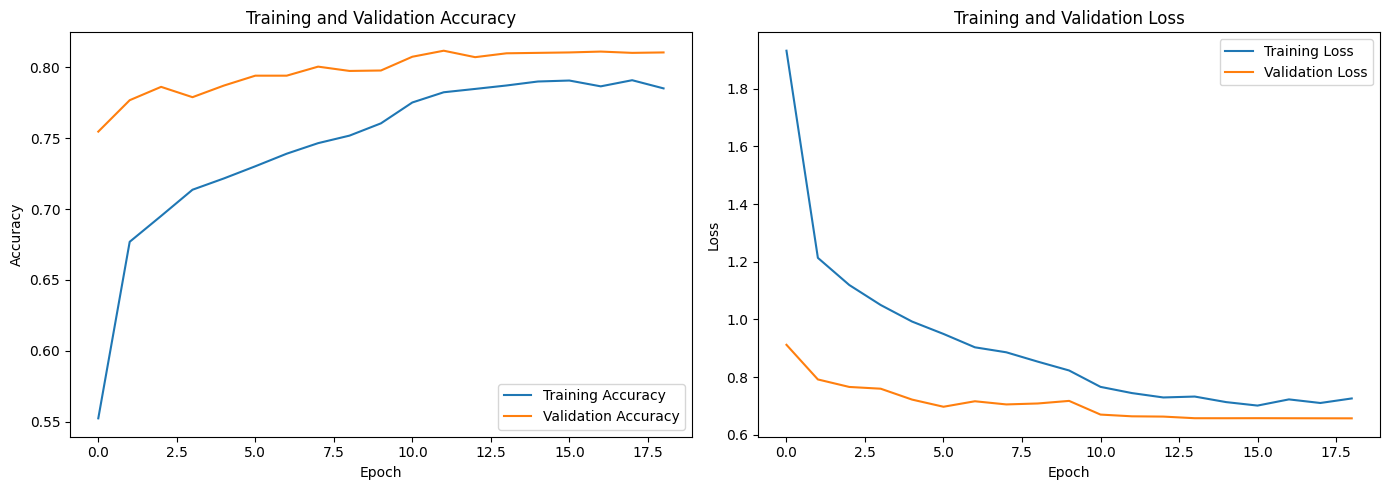

In [23]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Test Prediction

In [24]:
# Predicting on test set
y_pred = np.argmax(model.predict(test_data), axis=1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 340s 5s/step


## Confusion matrix

In [56]:
# Get the true labels
test_labels = test_data.classes

# confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(100, 100))

#class labels
class_names = list(test_data.class_indices.keys())

# Extract just the breed names by splitting at the second dash
breed_names = []
for name in class_names:
    parts = name.split('-')
    if len(parts) > 2:
        # Join parts from index 1 onwards to keep underscores
        breed_name = '-'.join(parts[1:])
    else:
        breed_name = parts[1]  # Only one dash, take the second part
    breed_names.append(breed_name)

# confusion matrix plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breed_names, yticklabels=breed_names, annot_kws={"size": 20} )
plt.xticks(rotation=90, ha='right', fontsize=18)  # Rotate x labels and adjust font size
plt.yticks(rotation=0, fontsize=18) 
plt.xlabel('Predicted Label', fontsize=24)
plt.ylabel('True Label', fontsize=24)
plt.title('Confusion Matrix', fontsize=28)

# Save the figure as a image file
plt.savefig('confusion_matrix_Inception.png', dpi=100, bbox_inches='tight')
plt.show()


## Classification Report

In [57]:
# classification Report
print(classification_report(test_labels, y_pred, target_names=breed_names))

                                precision    recall  f1-score   support

                     Chihuahua       0.72      0.93      0.81        30
              Japanese_spaniel       0.82      0.86      0.84        37
                   Maltese_dog       0.80      0.90      0.85        50
                      Pekinese       0.84      0.70      0.76        30
                      Shih-Tzu       0.75      0.77      0.76        43
              Blenheim_spaniel       0.83      0.89      0.86        38
                      papillon       0.92      0.85      0.88        39
                   toy_terrier       0.77      0.79      0.78        34
           Rhodesian_ridgeback       0.58      0.63      0.60        35
                  Afghan_hound       0.88      0.94      0.91        48
                        basset       0.84      0.74      0.79        35
                        beagle       0.71      0.74      0.72        39
                    bloodhound       0.86      0.81      0.83  